In [5]:
import json
jsonfile = open("Melli.json")
data = json.load(jsonfile)

In [35]:
def IoU(box1, box2):
    x1, y1, x2, y2 = box1
    X1, Y1, X2, Y2 = box2
    intersection = max(0, min(x2, X2) - max(x1, X1) + 1) * max(0, min(y2, Y2) - max(y1, Y1) + 1)
    S_box1 = (x2 - x1 + 1) * (y2 - y1 + 1)
    S_box2 = (X2 - X1 + 1) * (Y2 - Y1 + 1)
    
    return intersection / (S_box1 + S_box2 - intersection)

In [31]:
def conv_box_format(label_me_format):
    my_format = [
        min(label_me_format[0][0], label_me_format[1][0]),
        min(label_me_format[0][1], label_me_format[1][1]),
        max(label_me_format[0][0], label_me_format[1][0]),
        max(label_me_format[0][1], label_me_format[1][1])
    ]
    return my_format

In [36]:
def find_max_IoU(box):
    return max(IoU(box, conv_box_format(shape["points"])) for shape in data["shapes"])

starting_x:450, starting_y:50, IoU:0.37244461689912145
starting_x:100, starting_y:100, IoU:0.37472576341704816
starting_x:150, starting_y:100, IoU:0.37472576341704816
starting_x:300, starting_y:100, IoU:0.37244461689912123
starting_x:650, starting_y:100, IoU:0.36789372959585726
starting_x:800, starting_y:100, IoU:0.3888061402989512
starting_x:950, starting_y:100, IoU:0.3679536096919535
starting_x:450, starting_y:200, IoU:0.37962418305483603
starting_x:500, starting_y:200, IoU:0.37588478487731125
starting_x:650, starting_y:200, IoU:0.3967673416465153
starting_x:700, starting_y:200, IoU:0.3967673416465153
starting_x:850, starting_y:200, IoU:0.3798959820232884
starting_x:900, starting_y:200, IoU:0.44087330957063015
starting_x:100, starting_y:250, IoU:0.42806467187247127
starting_x:150, starting_y:250, IoU:0.3709928808071748
starting_x:250, starting_y:250, IoU:0.40692699795073206
starting_x:300, starting_y:250, IoU:0.40692699795073206
starting_x:450, starting_y:250, IoU:0.41616880023545694

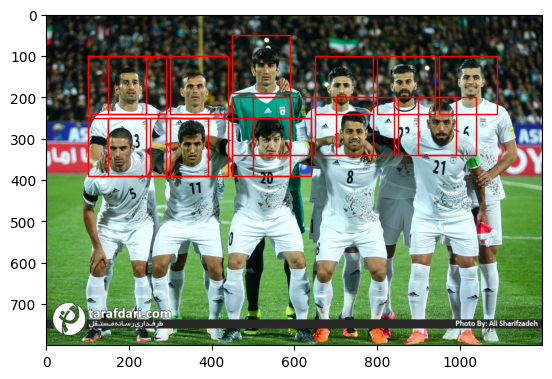

In [55]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
x = np.array(Image.open('Melli.jpg'), dtype=np.uint8)
fig, ax = plt.subplots(1)
ax.imshow(x)

windows = []

SLIDING_WINDOW_H = SLIDING_WINDOW_W = 140
STEP = 50
IMAGE_H = image.shape[0]
IMAGE_W = image.shape[1]
for i in range(0, IMAGE_H, STEP):
    for j in range(0, IMAGE_W, STEP):
        if find_max_IoU((j, i, j + SLIDING_WINDOW_W, i + SLIDING_WINDOW_H)) > 0.35:
            ax.add_patch(patches.Rectangle((j, i), SLIDING_WINDOW_W, SLIDING_WINDOW_H, linewidth=1, edgecolor='r', facecolor="none"))
            print(f"starting_x:{j}, starting_y:{i}, IoU:{find_max_IoU((j, i, j + SLIDING_WINDOW_W, i + SLIDING_WINDOW_H))}")
            windows.append((j, i, "Face"))
        else:
            windows.append((j, i, "Background"))
plt.show()

(250, 50, 'Background')
(350, 300, 'Background')
(850, 450, 'Background')
(1150, 50, 'Background')
(650, 100, 'Face')


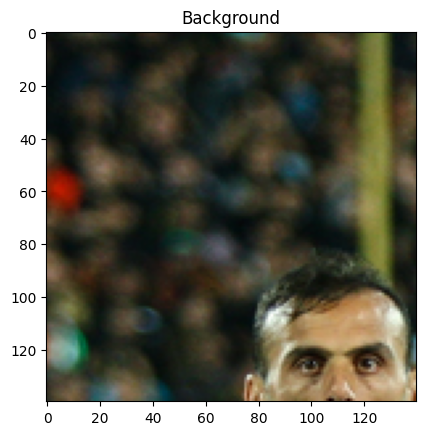

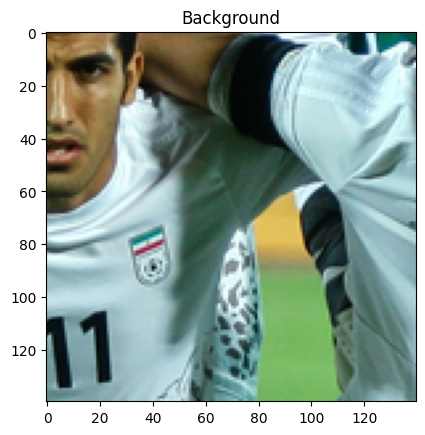

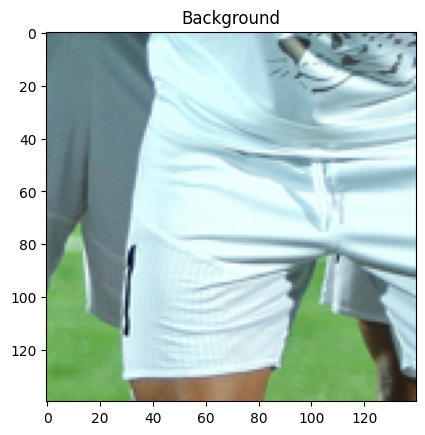

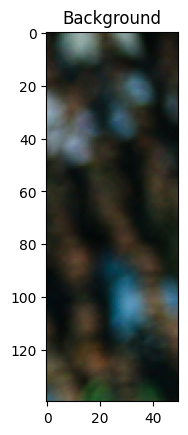

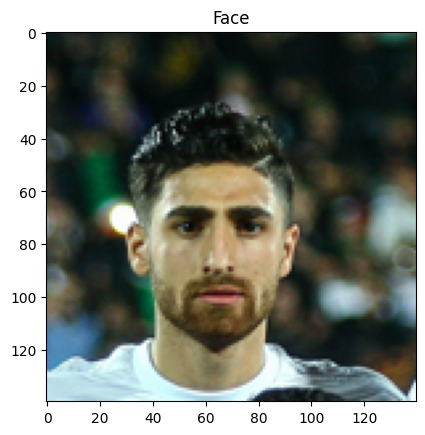

In [62]:
import random
random_windows = random.sample(windows, 5)
for window in random_windows:
    print(window)
    fig, ax = plt.subplots(1)
    ax.imshow(x[window[1]:window[1]+SLIDING_WINDOW_W , window[0]:window[0]+SLIDING_WINDOW_H])
    ax.set_title(window[2])